# Song feature analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as skc
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import mlxtend as mlx
import mlxtend.preprocessing as mlp
import mlxtend.frequent_patterns as FP

## Preprocesamiento

Primero lo que queremos hacer es quitar las columnas que no necesitamos y pasar a datos numéricos las columnas que sí necesitamos

In [2]:
df=pd.read_csv('data/song-features-v2.csv', encoding = "ISO-8859-1")
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,song_name,artist(s),gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,song_language,label,lat,lon
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,...,Held Down,['Laura Marling'],F,solo,England,1,English,F,24.548173,-43.902242
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,...,Blank Slate,['Chicano Batman'],M,band,United States,1,English,F,40.000000,-100.000000
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,...,Back Home (feat. Summer Walker),"['Trey Songz', 'Summer Walker']",V,colab,United States,2,English,F,40.000000,-100.000000
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,...,Ohio,['King Princess'],F,solo,United States,1,English,F,40.000000,-100.000000
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,...,Cellular,['King Krule'],M,solo,England,1,English,F,24.548173,-43.902242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,...,Cuando Perriabas,['Bad Bunny'],M,solo,Puerto Rico,1,Spanish,RF,18.220833,-66.590149
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,...,Levitating (feat. DaBaby),"['Dua Lipa', 'DaBaby']",V,colab,England,2,English,RF,24.548173,-43.902242
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,...,When We Were Young,"['Lost Kings', 'Norma Jean Martine']",V,colab,United States,2,English,R,40.000000,-100.000000
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,...,Serenity,"['Chamsi', 'AJ Euro']",V,colab,United States,2,English,R,40.000000,-100.000000


In [3]:
columns_to_delete=['id','uri','type','track_href','analysis_url','lat','lon']
df.drop(columns_to_delete, inplace=True, axis=1)

In [4]:
song_name=df['song_name']
artists=df['artist(s)']

In [5]:
df.drop('artist(s)', inplace=True, axis=1)
df.drop('song_name', inplace=True, axis=1)

In [6]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,song_language,label
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,79.442,247920,4,F,solo,England,1,English,F
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,116.092,179987,4,M,band,United States,1,English,F
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,86.036,194576,4,V,colab,United States,2,English,F
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,87.500,293600,4,F,solo,United States,1,English,F
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,132.666,179040,4,M,solo,England,1,English,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,81.998,188654,4,M,solo,Puerto Rico,1,Spanish,RF
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4,V,colab,England,2,English,RF
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,129.916,193911,4,V,colab,United States,2,English,R
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,159.946,242750,4,V,colab,United States,2,English,R


In [7]:
countries=df['country'].unique()
dic_country = {key: i+1 for i,key in enumerate(countries)}
dic_country

{'England': 1,
 'United States': 2,
 'Canada': 3,
 'Spain': 4,
 'France': 5,
 'Chile': 6,
 'Puerto Rico': 7,
 'Argentina': 8,
 'Mexico': 9,
 'Colombia': 10,
 'Peru': 11,
 'Norway': 12,
 'Germany': 13,
 'Japan': 14,
 'Australia': 15,
 'Sweden': 16,
 'Niger': 17,
 'Malaysia': 18,
 'Korea': 19,
 'Venezuela': 20,
 'Panama': 21,
 'Ireland': 22,
 'Zimbawe': 23,
 'Switzerland': 24,
 'New Zeland': 25,
 'Sudan': 26,
 'Dominican Republic': 27,
 'Belarus': 28,
 'Iran': 29,
 'Italy': 30,
 'Cuba': 31,
 'Mali': 32,
 'Netherlands': 33,
 'Yugoslavia': 34,
 'South Africa': 35,
 'Israel': 36,
 'Denmark': 37,
 'Rusia': 38,
 'Brazil': 39,
 'Poland': 40,
 'Belgium': 41,
 'Greece': 42}

In [8]:
df['country'].replace(dic_country,inplace=True)

In [9]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,song_language,label
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,79.442,247920,4,F,solo,1,1,English,F
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,116.092,179987,4,M,band,2,1,English,F
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,86.036,194576,4,V,colab,2,2,English,F
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,87.500,293600,4,F,solo,2,1,English,F
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,132.666,179040,4,M,solo,1,1,English,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,81.998,188654,4,M,solo,7,1,Spanish,RF
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4,V,colab,1,2,English,RF
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,129.916,193911,4,V,colab,2,2,English,R
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,159.946,242750,4,V,colab,2,2,English,R


In [10]:
typee = df['type(solo, colab, grpup/band)'].unique()
dic_type = {key: i+1 for i,key in enumerate(typee)}
dic_type

{'solo': 1, 'band': 2, 'colab': 3, 'band-colab': 4}

In [11]:
df['type(solo, colab, grpup/band)'].replace(dic_type,inplace=True)

In [12]:
gender = df['gender(of the atrist(s))'].unique()
dic_gen = {key: i+1 for i,key in enumerate(gender)}
dic_gen

{'F': 1, 'M': 2, 'V': 3}

In [13]:
df['gender(of the atrist(s))'].replace(dic_gen,inplace=True)

In [14]:
language = df['song_language'].unique()
dic_lan = {key: i+1 for i,key in enumerate(language)}
dic_lan

{'English': 1,
 'Spanish': 2,
 'French': 3,
 'English-Italian': 4,
 'English-Korean': 5,
 'No/Lang': 6,
 'English-Spanish': 7,
 'Korean': 8,
 'English-French': 9,
 'Russian': 10,
 'Portuguese-Spanish': 11,
 'French-Spanish': 12}

In [15]:
df['song_language'].replace(dic_lan,inplace=True)

In [16]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,song_language,label
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,79.442,247920,4,1,1,1,1,1,F
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,116.092,179987,4,2,2,2,1,1,F
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,86.036,194576,4,3,3,2,2,1,F
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,87.500,293600,4,1,1,2,1,1,F
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,132.666,179040,4,2,1,1,1,1,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,81.998,188654,4,2,1,7,1,2,RF
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4,3,3,1,2,1,RF
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,129.916,193911,4,3,3,2,2,1,R
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,159.946,242750,4,3,3,2,2,1,R


In [17]:
like = df['label'].unique()
dic_likes = {key: i+1 for i,key in enumerate(like)}
dic_likes

{'F': 1, 'FR': 2, 'RF': 3, 'R': 4}

In [18]:
dic_likes['RF'] = 2
dic_likes['R'] = 3
dic_likes


{'F': 1, 'FR': 2, 'RF': 2, 'R': 3}

In [19]:
df['label'].replace(dic_likes,inplace=True)

In [20]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,song_language,label
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,79.442,247920,4,1,1,1,1,1,1
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,116.092,179987,4,2,2,2,1,1,1
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,86.036,194576,4,3,3,2,2,1,1
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,87.500,293600,4,1,1,2,1,1,1
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,132.666,179040,4,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,81.998,188654,4,2,1,7,1,2,2
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4,3,3,1,2,1,2
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,129.916,193911,4,3,3,2,2,1,3
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,159.946,242750,4,3,3,2,2,1,3


## Clustering kmeans

En este caso vamos a aplicar clustering a las canciones individuales de cada uno y a las canciones en común, es por esto que primero necesitamos dividir los datos

Algo muy importante en esta parte es que nos dimos cuenta de la importancia de estandarizar o normalizar los datos, ya que al pricipio lo haciamos con los datos originales y lo que pasaba es que como teniamos unidades muy diferentes (algunos atributos iban de 0 a 1 y otros estaban sobre el rango de los 100000) lo que sucedía es que los atributos que tenían un mayor rango son los que ponían más distancia entre los datos por lo cual eran los que los dividian mejor y al final esos eran los atributos que definian los clusters más que nada, lo cual no era lo que queriamos ya que queremos que de alguna forma todos los atributos tengan el mismo peso a la hora de formar los clusters. Es por esto que usamos el StandardScaler de Sklearn para normalizar los datos, que básicamente consiste en restarles la media a los datos y dividirlos entre la desviación estándar

Otra cosa que consideramos al momento de hacer los clustering es que algunas columnas no nos interesaban tanto para formar estos clusters, por lo cual algunas columnas las quitamos para que los clusters quedaran con la música más parecida posible y no se sesgaran por atributos que no tenian mucho que ver. También dejamos algunos atributos que tampoco tienen mucho que ver con la música pero los dejamos porque querimos que también fueran un factor de división en los clusters

In [21]:
#Separamos los datos en las canciones que les gustan a cada uno y a ambos
fer_songs = df[(df.label == 1) | (df.label == 2)]
rafa_songs = df[(df.label == 3) | (df.label == 2)]
both_songs = df[(df.label == 2)]

In [22]:
fer_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,song_language,label
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.3990,79.442,247920,4,1,1,1,1,1,1
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.8250,116.092,179987,4,2,2,2,1,1,1
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.3510,86.036,194576,4,3,3,2,2,1,1
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.1750,87.500,293600,4,1,1,2,1,1,1
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.3200,132.666,179040,4,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.760,0.886,9,-5.356,0,0.0258,0.02190,0.000007,0.6230,0.7800,123.002,189399,4,3,3,13,2,1,2
981,0.764,0.725,7,-8.812,1,0.0576,0.46300,0.000006,0.1090,0.0794,100.063,177653,4,2,1,2,1,1,2
985,0.729,0.805,6,-3.830,1,0.1840,0.19000,0.225000,0.0909,0.3450,191.994,225373,4,1,1,2,1,2,2
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.4990,81.998,188654,4,2,1,7,1,2,2


### Cluster de Fer

In [23]:
fer_songs.drop('label', inplace=True, axis=1)
fer_songs.drop('number_integrants', inplace=True, axis=1)
fer_songs.drop('type(solo, colab, grpup/band)', inplace=True, axis=1)
fer_songs.drop('duration_ms', inplace=True, axis=1)

numpy_data = fer_songs.to_numpy()
scaler = StandardScaler().fit(numpy_data)
numpy_data_fer = scaler.transform(numpy_data)

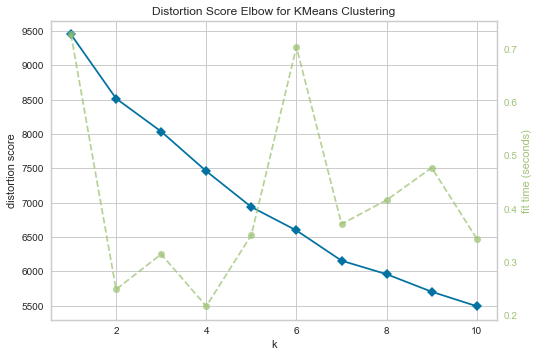

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)

In [24]:
X, y = numpy_data_fer,1
kelbow_visualizer(KMeans(random_state=4), X, k=(1,11))

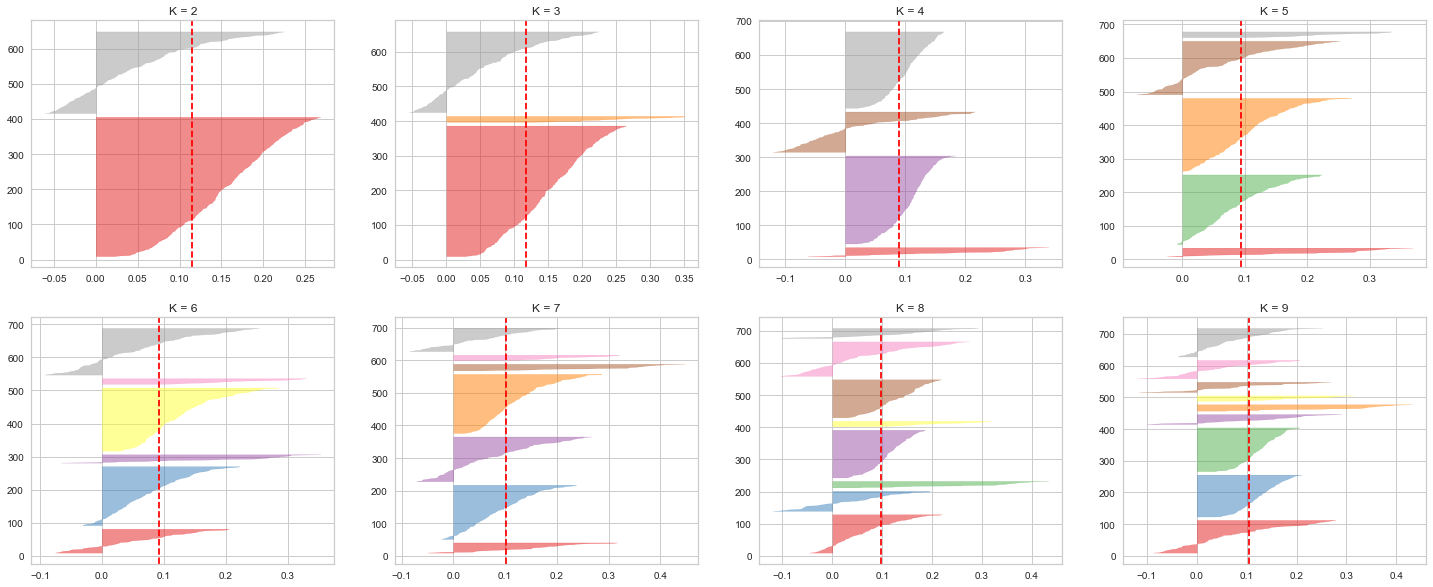

In [25]:
fig, axs = plt.subplots(2, 4, figsize=(25,10))

j = 0
k = 0
k_model = 2
for i in range(8):
    model = KMeans(k_model)
    visualizer = SilhouetteVisualizer(model, ax = axs[k,j])
    visualizer.fit(numpy_data_fer)  
    axs[k,j].set_title("K = " + str(k_model))
    k_model = k_model + 1
    j = j + 1
    if j == 4:
        k = k + 1
        j = 0
plt.show()   

In [26]:
results = KMeans(n_clusters=8,init='random',max_iter=1300).fit(numpy_data_fer)
r = results.cluster_centers_
labels = results.labels_
labels

array([4, 6, 1, 4, 4, 6, 4, 3, 7, 6, 5, 1, 5, 4, 6, 4, 1, 3, 6, 1, 1, 6,
       4, 4, 3, 1, 1, 4, 1, 4, 1, 3, 1, 1, 3, 4, 6, 3, 1, 4, 5, 5, 5, 4,
       4, 0, 6, 4, 6, 6, 6, 1, 5, 1, 7, 4, 4, 1, 6, 3, 1, 6, 4, 5, 6, 4,
       5, 6, 6, 4, 3, 4, 6, 3, 6, 1, 5, 6, 4, 4, 6, 4, 5, 6, 6, 1, 4, 6,
       3, 7, 6, 5, 5, 7, 1, 3, 1, 6, 6, 6, 4, 3, 1, 7, 6, 3, 5, 4, 1, 7,
       4, 4, 4, 4, 2, 4, 4, 4, 4, 7, 3, 4, 6, 1, 3, 1, 3, 7, 5, 4, 3, 3,
       3, 3, 3, 5, 1, 0, 6, 6, 6, 0, 6, 4, 1, 4, 5, 1, 6, 4, 4, 1, 1, 6,
       4, 1, 6, 6, 2, 1, 6, 2, 2, 2, 6, 6, 4, 5, 7, 4, 4, 4, 2, 5, 1, 1,
       6, 5, 6, 4, 0, 5, 6, 4, 6, 4, 5, 1, 1, 6, 4, 4, 3, 6, 5, 6, 4, 5,
       1, 1, 3, 6, 5, 4, 6, 6, 5, 2, 5, 1, 6, 6, 5, 6, 2, 5, 6, 1, 6, 6,
       4, 6, 6, 3, 4, 3, 4, 3, 6, 4, 4, 6, 4, 6, 5, 6, 4, 5, 1, 5, 6, 1,
       5, 6, 7, 6, 1, 3, 7, 7, 4, 5, 5, 7, 5, 3, 6, 2, 5, 6, 5, 0, 6, 1,
       5, 3, 4, 4, 4, 4, 4, 5, 6, 6, 6, 6, 5, 1, 2, 6, 0, 5, 6, 1, 3, 4,
       4, 4, 1, 6, 6, 3, 6, 3, 5, 1, 5, 4, 6, 1, 2,

In [27]:
r.shape

(8, 15)

In [28]:
fer_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,gender(of the atrist(s)),country,song_language
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.3990,79.442,4,1,1,1
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.8250,116.092,4,2,2,1
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.3510,86.036,4,3,2,1
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.1750,87.500,4,1,2,1
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.3200,132.666,4,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.760,0.886,9,-5.356,0,0.0258,0.02190,0.000007,0.6230,0.7800,123.002,4,3,13,1
981,0.764,0.725,7,-8.812,1,0.0576,0.46300,0.000006,0.1090,0.0794,100.063,4,2,2,1
985,0.729,0.805,6,-3.830,1,0.1840,0.19000,0.225000,0.0909,0.3450,191.994,4,1,2,2
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.4990,81.998,4,2,7,2


In [29]:
r[0], r[1], r[2], r[3]

(array([-1.32190096, -0.64484176,  0.05107452, -0.57811637,  0.46241938,
        -0.09517579,  1.20364075,  0.2848436 ,  0.2464436 , -0.62542185,
         0.67829297, -5.52637581,  0.12169899, -0.08964522, -0.33344245]),
 array([-0.57394501,  0.69488289, -0.12032178,  0.5728185 ,  0.60092405,
        -0.18555534, -0.48743732, -0.20275607,  0.30776264,  0.08450326,
         0.69182759,  0.14400979,  0.26641338, -0.1302295 , -0.2233605 ]),
 array([ 1.99054293e-02,  7.03985711e-01,  1.59283242e-01,  7.02106870e-01,
         1.43509462e-01, -2.54428007e-01, -2.61435091e-01, -9.66387428e-02,
        -3.01377550e-02, -3.65627369e-03,  3.31203387e-01,  4.14028155e-01,
        -5.86367859e-01,  1.54746546e+00,  4.66232378e+00]),
 array([-0.54208127, -1.43359741,  0.17226829, -1.38100837, -0.07671889,
        -0.31288066,  2.06995714, -0.14427659, -0.09844242, -0.68674237,
        -0.17801859,  0.2509982 , -0.24945162,  0.13129943, -0.12332408]))

Ejemplos de algunos clusters formados

In [30]:
cols = fer_songs.columns
for centroid in zip(r[0], r[1], r[2], r[3], r[4],  r[5], r[6], r[7], cols):
    print(centroid[8])
    print('cluster1 = ', centroid[0])
    print('cluster2 = ', centroid[1])
    print('cluster3 = ', centroid[2])
    print('cluster4 = ', centroid[3])
    print('cluster5 = ', centroid[4])
    print('cluster6 = ', centroid[5])
    print('cluster7 = ', centroid[6])
    print('cluster8 = ', centroid[7])
    print('\n')
    

danceability
cluster1 =  -1.3219009597619873
cluster2 =  -0.5739450149417159
cluster3 =  0.019905429331817034
cluster4 =  -0.542081265097598


energy
cluster1 =  -0.6448417550624455
cluster2 =  0.6948828937598721
cluster3 =  0.7039857105172916
cluster4 =  -1.4335974062266443


key
cluster1 =  0.05107451789012923
cluster2 =  -0.12032178271233916
cluster3 =  0.15928324223362308
cluster4 =  0.17226828915484235


loudness
cluster1 =  -0.5781163668276996
cluster2 =  0.572818500799388
cluster3 =  0.7021068704304119
cluster4 =  -1.3810083716960673


mode
cluster1 =  0.46241937746044187
cluster2 =  0.6009240487863731
cluster3 =  0.1435094619704819
cluster4 =  -0.07671889476409417


speechiness
cluster1 =  -0.09517579447637893
cluster2 =  -0.1855553351697639
cluster3 =  -0.25442800701783336
cluster4 =  -0.31288065702146023


acousticness
cluster1 =  1.2036407463874712
cluster2 =  -0.48743731569093085
cluster3 =  -0.26143509062321624
cluster4 =  2.069957139718141


instrumentalness
cluster1 =  0

### Cluster de Rafa

In [31]:
rafa_songs.drop('label', inplace=True, axis=1)
rafa_songs.drop('number_integrants', inplace=True, axis=1)
rafa_songs.drop('type(solo, colab, grpup/band)', inplace=True, axis=1)
rafa_songs.drop('duration_ms', inplace=True, axis=1)

numpy_data = rafa_songs.to_numpy()
scaler = StandardScaler().fit(numpy_data)
numpy_data_rafa = scaler.transform(numpy_data)

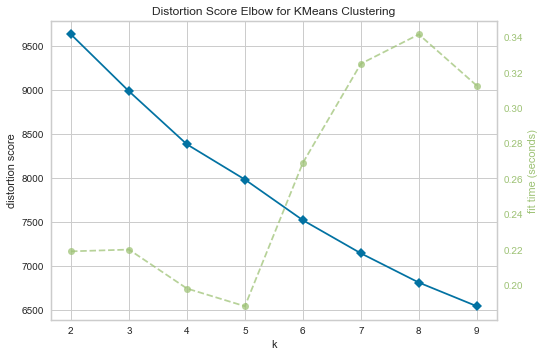

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(numpy_data_rafa)  
visualizer.poof()  

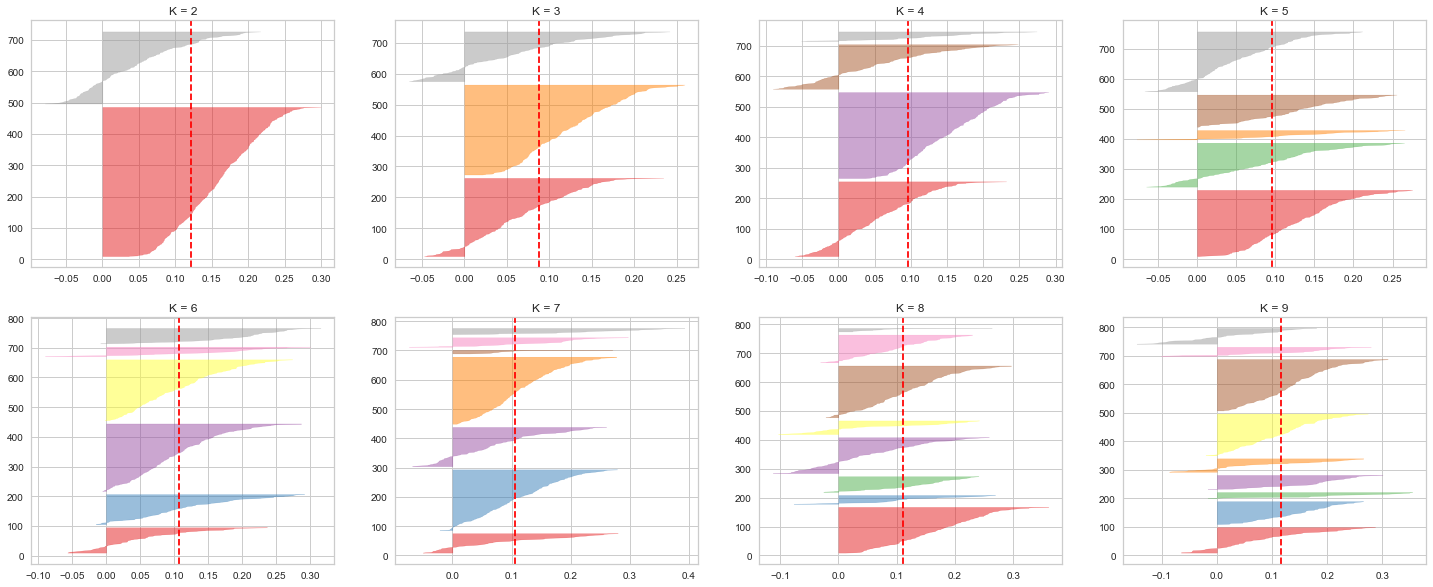

In [33]:
fig, axs = plt.subplots(2, 4, figsize=(25,10))

j = 0
k = 0
k_model = 2
for i in range(8):
    model = KMeans(k_model)
    visualizer = SilhouetteVisualizer(model, ax = axs[k,j])
    visualizer.fit(numpy_data_rafa)  
    axs[k,j].set_title("K = " + str(k_model))
    k_model = k_model + 1
    j = j + 1
    if j == 4:
        k = k + 1
        j = 0
plt.show()   

In [34]:
results = KMeans(n_clusters=8,init='random',max_iter= 1300).fit(numpy_data_rafa)
r = results.cluster_centers_
labels = results.labels_
rafa_songs['cluster'] = labels
# sns_plot = sns.pairplot(rafa_songs,hue='cluster')
# sns_p = sns.lmplot(x='duration_ms',y='valence',data=rafa_songs,hue='cluster',fit_reg=False)
# sns_p.savefig("output2.png")
labels
# r.shape

array([1, 2, 1, 3, 3, 2, 3, 1, 6, 3, 3, 3, 1, 1, 2, 1, 2, 1, 1, 1, 3, 0,
       1, 2, 2, 3, 2, 6, 1, 1, 3, 2, 1, 1, 2, 1, 3, 2, 3, 1, 2, 1, 1, 2,
       1, 1, 2, 5, 3, 1, 1, 2, 3, 2, 2, 3, 1, 2, 7, 2, 3, 1, 5, 2, 2, 7,
       1, 1, 1, 6, 1, 1, 7, 7, 2, 1, 1, 2, 1, 1, 6, 3, 3, 2, 2, 1, 2, 2,
       1, 6, 2, 1, 1, 1, 1, 2, 7, 1, 3, 3, 1, 2, 7, 6, 6, 1, 3, 2, 1, 1,
       2, 1, 3, 2, 3, 1, 1, 1, 2, 2, 7, 1, 6, 2, 2, 3, 2, 3, 1, 1, 1, 7,
       1, 1, 6, 2, 1, 6, 2, 3, 3, 6, 3, 2, 7, 3, 1, 2, 3, 2, 6, 1, 1, 6,
       2, 7, 2, 2, 7, 2, 1, 1, 1, 2, 3, 5, 3, 3, 6, 2, 2, 3, 1, 2, 2, 2,
       0, 6, 2, 3, 0, 1, 6, 6, 2, 6, 1, 2, 6, 1, 1, 5, 6, 2, 5, 2, 5, 1,
       1, 2, 6, 1, 2, 1, 6, 1, 2, 4, 4, 4, 1, 2, 6, 3, 6, 2, 1, 3, 2, 2,
       6, 4, 3, 3, 6, 1, 1, 1, 1, 5, 4, 1, 2, 2, 1, 4, 6, 6, 2, 5, 5, 1,
       1, 3, 1, 3, 1, 6, 4, 2, 1, 1, 5, 3, 1, 1, 6, 2, 1, 1, 1, 1, 7, 1,
       6, 2, 1, 1, 3, 2, 7, 2, 0, 3, 4, 4, 5, 1, 1, 5, 6, 6, 3, 3, 6, 2,
       3, 3, 2, 1, 6, 0, 0, 2, 2, 2, 1, 3, 0, 4, 7,

In [35]:
cols = rafa_songs.columns
for centroid in zip(r[0], r[1], r[2], r[3], r[4],  r[5], r[6], r[7], cols):
    print(centroid[8])
    print('cluster1 = ', centroid[0])
    print('cluster2 = ', centroid[1])
    print('cluster3 = ', centroid[2])
    print('cluster4 = ', centroid[3])
    print('cluster5 = ', centroid[4])
    print('cluster6 = ', centroid[5])
    print('cluster7 = ', centroid[6])
    print('cluster8 = ', centroid[7])
    print('\n')

-0.6384782742310956
cluster1 =  -1.1702336328891707
cluster2 =  0.5311701521316149
cluster3 =  0.2860070614361633
cluster4 =  0.1111058172088244
cluster5 =  -0.6384782742310956
cluster6 =  0.15390438597421716
cluster7 =  -0.9857159844335585
cluster8 =  0.10107040978841612


0.34516815108068416
cluster1 =  -0.5504839212961338
cluster2 =  0.3176135796663565
cluster3 =  -1.2846380454133826
cluster4 =  0.09102582849522657
cluster5 =  0.34516815108068416
cluster6 =  0.7255190456503202
cluster7 =  0.5826793771831726
cluster8 =  0.04099524391279979


0.03414646868268283
cluster1 =  -0.3004773967837477
cluster2 =  0.6638583422132701
cluster3 =  -0.03974477687109778
cluster4 =  -0.9325446982203389
cluster5 =  0.03414646868268283
cluster6 =  0.10553189035912268
cluster7 =  0.13763341205773902
cluster8 =  0.3271852544686162


0.30100439188410827
cluster1 =  -0.7587493694214339
cluster2 =  0.4061788495111997
cluster3 =  -1.0784123502983918
cluster4 =  0.24944471897284615
cluster5 =  0.301004391884

### Cluster de ambos

In [36]:
both_songs.drop('label', inplace=True, axis=1)
both_songs.drop('number_integrants', inplace=True, axis=1)
both_songs.drop('type(solo, colab, grpup/band)', inplace=True, axis=1)
both_songs.drop('duration_ms', inplace=True, axis=1)

numpy_data = both_songs.to_numpy()
scaler = StandardScaler().fit(numpy_data)
numpy_data_both = scaler.transform(numpy_data)

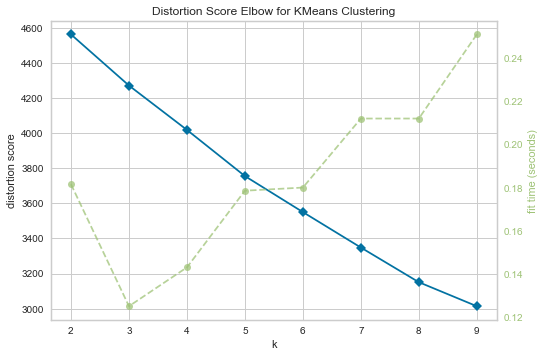

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(numpy_data_both)  
visualizer.poof()  

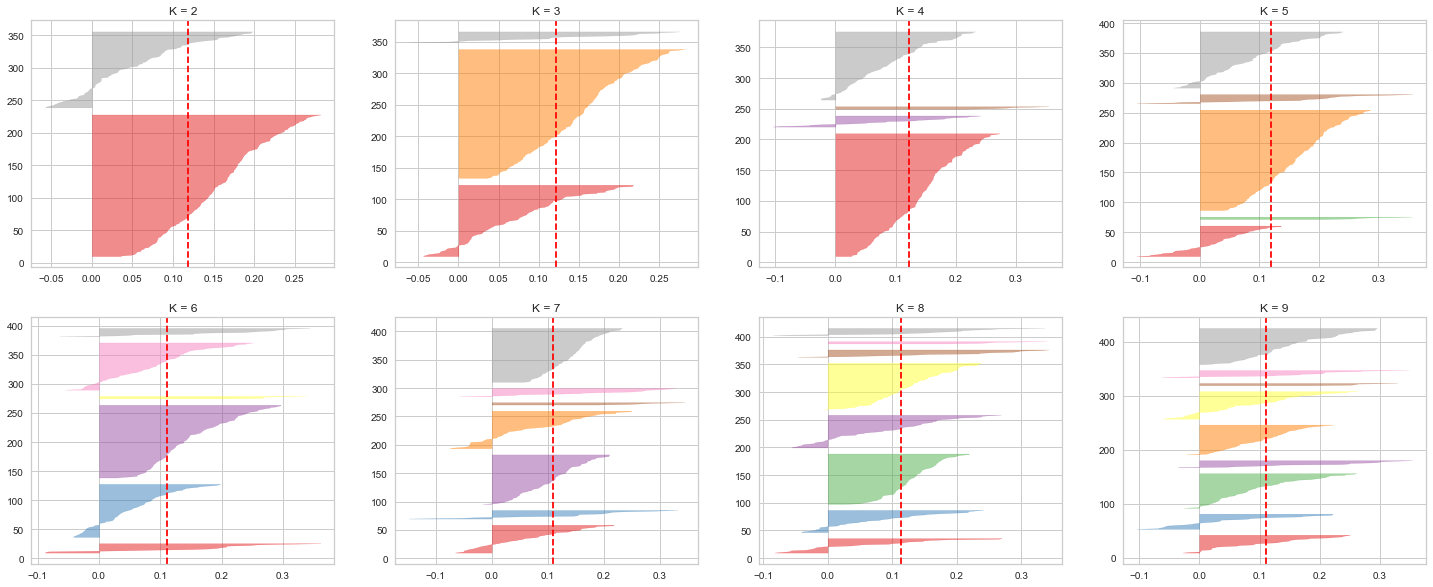

In [38]:
fig, axs = plt.subplots(2, 4, figsize=(25,10))

j = 0
k = 0
k_model = 2
for i in range(8):
    model = KMeans(k_model)
    visualizer = SilhouetteVisualizer(model, ax = axs[k,j])
    visualizer.fit(numpy_data_both)  
    axs[k,j].set_title("K = " + str(k_model))
    k_model = k_model + 1
    j = j + 1
    if j == 4:
        k = k + 1
        j = 0
plt.show() 

In [39]:
results = KMeans(n_clusters=7,init='random',max_iter=1000).fit(numpy_data_both)
r = results.cluster_centers_
labels = results.labels_
labels

array([3, 1, 3, 5, 6, 1, 6, 3, 3, 6, 5, 5, 3, 6, 1, 3, 5, 6, 6, 6, 3, 0,
       3, 1, 5, 6, 6, 6, 3, 6, 5, 2, 6, 3, 1, 5, 5, 1, 6, 3, 5, 5, 3, 1,
       5, 6, 1, 2, 6, 3, 3, 1, 5, 1, 1, 6, 3, 1, 4, 5, 5, 3, 2, 1, 1, 4,
       5, 3, 6, 6, 3, 5, 4, 4, 5, 6, 6, 5, 3, 3, 3, 6, 5, 5, 1, 3, 6, 5,
       3, 3, 1, 3, 6, 3, 3, 5, 4, 6, 6, 5, 3, 6, 4, 1, 6, 3, 5, 1, 3, 3,
       1, 6, 5, 5, 6, 6, 3, 3, 1, 5, 4, 3, 6, 1, 5, 6, 1, 5, 6, 3, 3, 4,
       3, 3, 6, 5, 3, 3, 1, 6, 5, 3, 3, 1, 4, 6, 6, 1, 5, 1, 6, 3, 3, 6,
       5, 4, 3, 5, 4, 1, 5, 3, 6, 1, 6, 2, 6, 6, 3, 5, 1, 6, 5, 1, 5, 5,
       0, 3, 5, 5, 0, 2, 6, 6, 1, 6, 3, 6, 6, 5, 6, 2, 3, 5, 2, 5, 2, 5,
       3, 5, 3, 3, 1, 6, 6, 3, 1, 3, 3, 6, 3, 1, 1, 1, 5, 6, 3, 6, 1, 5,
       1, 5, 3, 3, 2, 6, 3, 3, 6, 6, 2, 2, 6, 3, 6, 1, 1, 0, 5, 4, 1, 1,
       3, 5, 5, 1, 6, 6, 1, 3, 3, 3, 3, 6, 6, 3, 5, 1, 5, 6, 2, 3, 3, 1,
       3, 1, 5, 3, 5, 1, 6, 5, 3, 3, 3, 1, 6, 3, 6, 0, 3, 2, 2, 6, 6, 6,
       6, 6, 6, 5, 5, 6, 3, 3, 6, 4, 6, 4, 6, 1, 3,

Ejemplo de algunos clusters formados

In [40]:
cols = both_songs.columns
for centroid in zip(r[0], r[1], r[2], r[3], cols):
    print(centroid[4])
    print('cluster1 = ', centroid[0])
    print('cluster2 = ', centroid[1])
    print('cluster3 = ', centroid[2])
    print('cluster4 = ', centroid[3])
    print('\n')

danceability
cluster1 =  -1.2418923165015403
cluster2 =  -0.190683894929931
cluster3 =  0.05885172255386145
cluster4 =  0.18750901502857922


energy
cluster1 =  -0.11991248811622875
cluster2 =  -1.1231118332815633
cluster3 =  0.35799857066676505
cluster4 =  0.7603824247281357


key
cluster1 =  -0.2891381076642827
cluster2 =  -0.04742320633513123
cluster3 =  -0.16953523261214204
cluster4 =  0.4536333053647994


loudness
cluster1 =  -0.46791528591644316
cluster2 =  -1.1388378089751656
cluster3 =  -0.7019823124077241
cluster4 =  0.5248450412976755


mode
cluster1 =  0.9339283817414599
cluster2 =  -0.45111931444628006
cluster3 =  0.5801623293096068
cluster4 =  -0.6878306001933275


speechiness
cluster1 =  0.2776930397517406
cluster2 =  -0.17094952088039087
cluster3 =  -0.4792650333050843
cluster4 =  -0.19274713351514552


acousticness
cluster1 =  1.3211339352462579
cluster2 =  1.187590647262354
cluster3 =  -0.7640669993203131
cluster4 =  -0.4760148315822449


instrumentalness
cluster1 =  0

## Patrones Frecuentes

En el caso de los patrones frecuentes nos dimos cuenta que teniamos que discretizar los atributos continuos que teniamos para poder identificar de mejor manera los patrones y eso fue lo que hicimos en las siguientes líneas

In [41]:
df.loc[df['acousticness'] < 0.5, 'acousticness'] = 0
df.loc[df['acousticness'] >= 0.5, 'acousticness'] = 1

df.loc[df['danceability'] <= 0.1, 'danceability'] = 0
df.loc[(df['danceability'] > 0.1) & (df['danceability'] <= 0.2), 'danceability'] = 1
df.loc[(df['danceability'] > 0.2) & (df['danceability'] <= 0.3), 'danceability'] = 2
df.loc[(df['danceability'] > 0.3) & (df['danceability'] <= 0.4), 'danceability'] = 3
df.loc[(df['danceability'] > 0.4) & (df['danceability'] <= 0.5), 'danceability'] = 4
df.loc[(df['danceability'] > 0.5) & (df['danceability'] <= 0.6), 'danceability'] = 5
df.loc[(df['danceability'] > 0.6) & (df['danceability'] <= 0.7), 'danceability'] = 6
df.loc[(df['danceability'] > 0.7) & (df['danceability'] <= 0.8), 'danceability'] = 7
df.loc[(df['danceability'] > 0.8) & (df['danceability'] <= 0.9), 'danceability'] = 8
df.loc[(df['danceability'] > 0.9) & (df['danceability'] < 1.0), 'danceability'] = 9

df.loc[(df['duration_ms'] > 0) & (df['duration_ms'] <= 60000), 'duration_ms'] = 0
df.loc[(df['duration_ms'] > 60000) & (df['duration_ms'] <= 120000), 'duration_ms'] = 1
df.loc[(df['duration_ms'] > 120000) & (df['duration_ms'] <= 180000), 'duration_ms'] = 2
df.loc[(df['duration_ms'] > 180000) & (df['duration_ms'] <= 240000), 'duration_ms'] = 3
df.loc[(df['duration_ms'] > 240000) & (df['duration_ms'] <= 300000), 'duration_ms'] = 4
df.loc[(df['duration_ms'] > 300000) & (df['duration_ms'] <= 360000), 'duration_ms'] = 5
df.loc[(df['duration_ms'] > 360000) & (df['duration_ms'] <= 420000), 'duration_ms'] = 6
df.loc[(df['duration_ms'] > 420000) & (df['duration_ms'] <= 480000), 'duration_ms'] = 7
df.loc[(df['duration_ms'] > 480000) & (df['duration_ms'] <= 540000), 'duration_ms'] = 8
df.loc[(df['duration_ms'] > 540000) & (df['duration_ms'] <= 600000), 'duration_ms'] = 9

df.loc[(df['energy'] > 0.0) & (df['energy'] <= 0.1), 'energy'] = 0
df.loc[(df['energy'] > 0.1) & (df['energy'] <= 0.2), 'energy'] = 1
df.loc[(df['energy'] > 0.2) & (df['energy'] <= 0.3), 'energy'] = 2
df.loc[(df['energy'] > 0.3) & (df['energy'] <= 0.4), 'energy'] = 3
df.loc[(df['energy'] > 0.4) & (df['energy'] <= 0.5), 'energy'] = 4
df.loc[(df['energy'] > 0.5) & (df['energy'] <= 0.6), 'energy'] = 5
df.loc[(df['energy'] > 0.6) & (df['energy'] <= 0.7), 'energy'] = 6
df.loc[(df['energy'] > 0.7) & (df['energy'] <= 0.8), 'energy'] = 7
df.loc[(df['energy'] > 0.8) & (df['energy'] <= 0.9), 'energy'] = 8
df.loc[(df['energy'] > 0.9) & (df['energy'] < 1.0), 'energy'] = 9

df.loc[df['instrumentalness'] < 0.5, 'instrumentalness'] = 0
df.loc[df['instrumentalness'] >= 0.5, 'instrumentalness'] = 1

df.loc[df['liveness'] < 0.8, 'liveness'] = 0
df.loc[df['liveness'] >= 0.8, 'liveness'] = 1

df.loc[df['loudness'] <= -15.2468, 'loudness'] = -1000
df.loc[(df['loudness'] > -15.2468) & (df['loudness'] <= -11.357600000000001), 'loudness'] = -2000
df.loc[(df['loudness'] > -11.357600000000001) & (df['loudness'] <= -7.468400000000002), 'loudness'] = -3000
df.loc[(df['loudness'] > -7.468400000000002) & (df['loudness'] <= -3.579200000000002), 'loudness'] = -4000
df.loc[df['loudness'] > -3.579200000000002, 'loudness'] = -5000


df.loc[(df['speechiness'] > 0.0) & (df['speechiness'] <= 0.33), 'speechiness'] = -1
df.loc[(df['speechiness'] > 0.33) & (df['speechiness'] <= 0.66), 'speechiness'] = -2
df.loc[df['speechiness'] > 0.66, 'speechiness'] = -3


df.loc[df['tempo'] <= 96, 'tempo'] = 0
df.loc[(df['tempo'] > 96) & (df['tempo'] <= 123), 'tempo'] = 1
df.loc[(df['tempo'] > 123) & (df['tempo'] <= 151), 'tempo'] = 2
df.loc[(df['tempo'] > 151) & (df['tempo'] <= 178), 'tempo'] = 3
df.loc[df['tempo'] > 178, 'tempo'] = 4

df.loc[(df['valence'] > 0.0) & (df['valence'] <= 0.2), 'valence'] = -1
df.loc[(df['valence'] > 0.2) & (df['valence'] <= 0.4), 'valence'] = -2
df.loc[(df['valence'] > 0.4) & (df['valence'] <= 0.6), 'valence'] = -3
df.loc[(df['valence'] > 0.6) & (df['valence'] <= 0.8), 'valence'] = -4
df.loc[df['valence'] > 0.8, 'valence'] = -5



In [42]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,song_language,label
0,4.0,4.0,7,-3000.0,1,-1.0,0.0,0.0,0.0,-2.0,0.0,4,4,1,1,1,1,1,1
1,6.0,8.0,8,-4000.0,1,-1.0,0.0,0.0,0.0,-5.0,1.0,2,4,2,2,2,1,1,1
2,6.0,7.0,0,-4000.0,1,-1.0,0.0,0.0,0.0,-2.0,0.0,3,4,3,3,2,2,1,1
3,2.0,5.0,7,-4000.0,1,-1.0,0.0,0.0,0.0,-1.0,0.0,4,4,1,1,2,1,1,1
4,6.0,7.0,2,-3000.0,1,-1.0,0.0,0.0,0.0,-2.0,2.0,2,4,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,7.0,7.0,0,-3000.0,1,-1.0,0.0,0.0,0.0,-3.0,0.0,3,4,2,1,7,1,2,2
997,7.0,8.0,6,-4000.0,0,-1.0,0.0,0.0,0.0,-5.0,1.0,3,4,3,3,1,2,1,2
998,5.0,7.0,8,-4000.0,1,-1.0,0.0,0.0,0.0,-2.0,2.0,3,4,3,3,2,2,1,3
999,4.0,7.0,4,-4000.0,1,-1.0,0.0,0.0,0.0,-2.0,3.0,4,4,3,3,2,2,1,3


In [43]:
 m_songs = df[df.label == 2]


In [44]:
mutual_songs = m_songs.drop('label', axis=1)
mutual_songs_binarizado = pd.get_dummies(mutual_songs, columns=mutual_songs.columns, dtype = bool)
# mutual_songs_binarizado[:,3:10]

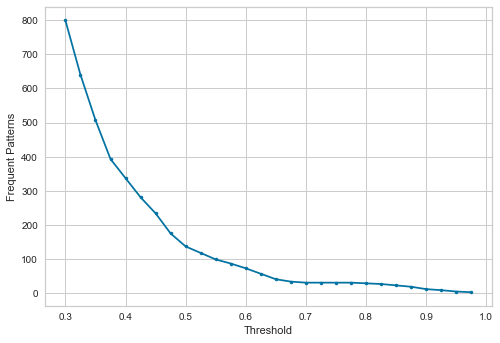

In [45]:
n_patterns = []
rango = np.arange(0.3, 1, 0.025)
for i in rango:
    pf = FP.apriori(mutual_songs_binarizado, min_support=i, use_colnames=True)
    l = len(pf)
    n_patterns.append(l)

plt.plot(rango, n_patterns, marker='.')    
plt.xlabel('Threshold')
plt.ylabel('Frequent Patterns')
plt.show()

In [46]:
pfMutualSongs = FP.apriori(mutual_songs_binarizado, min_support=0.25, use_colnames=True)
# pfMutualSongs[50:100]
for pattern in zip(pfMutualSongs.itemsets, pfMutualSongs.support):
    # if len(pattern) >= 2:
    if 'time_signature_4' not in list(pattern[0]) and 'mode_1' not in list(pattern[0]) and 'mode_0' not in list(pattern[0]):
        print(list(pattern[0]),pattern[1])

['danceability_7.0'] 0.3560830860534125
['energy_7.0'] 0.26112759643916916
['loudness_-4000.0'] 0.6795252225519288
['speechiness_-1.0'] 0.9347181008902077
['acousticness_0.0'] 0.9020771513353115
['instrumentalness_0.0'] 0.9584569732937686
['liveness_0.0'] 0.9970326409495549
['valence_-4.0'] 0.258160237388724
['valence_-3.0'] 0.27596439169139464
['valence_-2.0'] 0.258160237388724
['tempo_1.0'] 0.3086053412462908
['tempo_2.0'] 0.314540059347181
['duration_ms_2'] 0.26706231454005935
['duration_ms_3'] 0.5519287833827893
['gender(of the atrist(s))_1'] 0.31750741839762614
['gender(of the atrist(s))_2'] 0.49258160237388726
['type(solo, colab, grpup/band)_1'] 0.49851632047477745
['type(solo, colab, grpup/band)_3'] 0.39762611275964393
['country_2'] 0.4124629080118694
['number_integrants_1'] 0.5845697329376854
['number_integrants_2'] 0.3056379821958457
['song_language_1'] 0.6765578635014837
['song_language_2'] 0.258160237388724
['speechiness_-1.0', 'danceability_7.0'] 0.3293768545994065
['dancea

In [47]:
rafa = df[(df.label == 3) | (df.label == 2)]
rafa_binarizado = pd.get_dummies(rafa, columns=rafa.columns, dtype = bool)
rafa_binarizado

,danceability_1.0,danceability_2.0,danceability_3.0,danceability_4.0,danceability_5.0,danceability_6.0,danceability_7.0,danceability_8.0,danceability_9.0,energy_2.0,...,song_language_3,song_language_5,song_language_6,song_language_7,song_language_8,song_language_9,song_language_11,song_language_12,label_2,label_3
5,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
13,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
15,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
997,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
998,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
999,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


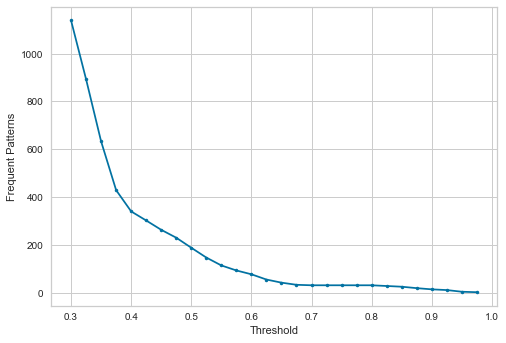

In [48]:
n_patterns = []
rango = np.arange(0.3, 1, 0.025)
for i in rango:
    pf = FP.apriori(rafa_binarizado, min_support=i, use_colnames=True)
    l = len(pf)
    n_patterns.append(l)

plt.plot(rango, n_patterns, marker='.')    
plt.xlabel('Threshold')
plt.ylabel('Frequent Patterns')
plt.show()

In [49]:
rafaSongs = FP.apriori(rafa_binarizado, min_support=0.25, use_colnames=True)

for pattern in zip(rafaSongs.itemsets, rafaSongs.support):
    # if len(pattern) >= 2:
    if 'time_signature_4' not in list(pattern[0]) and 'mode_1' not in list(pattern[0]) and 'mode_0' not in list(pattern[0]):
        print(list(pattern[0]),pattern[1])

['danceability_6.0'] 0.2711864406779661
['danceability_7.0'] 0.3206214689265537
['energy_7.0'] 0.2796610169491525
['loudness_-4000.0'] 0.6864406779661016
['speechiness_-1.0'] 0.9491525423728814
['acousticness_0.0'] 0.9096045197740112
['instrumentalness_0.0'] 0.9505649717514124
['liveness_0.0'] 0.9971751412429378
['valence_-3.0'] 0.2810734463276836
['valence_-2.0'] 0.2725988700564972
['tempo_1.0'] 0.2740112994350282
['tempo_2.0'] 0.3827683615819209
['duration_ms_3'] 0.5748587570621468
['gender(of the atrist(s))_2'] 0.6087570621468926
['type(solo, colab, grpup/band)_1'] 0.3827683615819209
['type(solo, colab, grpup/band)_3'] 0.5466101694915254
['country_2'] 0.3898305084745763
['number_integrants_1'] 0.4449152542372881
['number_integrants_2'] 0.3954802259887006
['song_language_1'] 0.6709039548022598
['song_language_2'] 0.2768361581920904
['label_2'] 0.4759887005649718
['label_3'] 0.5240112994350282
['speechiness_-1.0', 'danceability_6.0'] 0.2655367231638418
['danceability_6.0', 'acousticne

In [50]:
fer = df[(df.label == 1) | (df.label == 2)]
fer_binarizado = pd.get_dummies(fer, columns=fer.columns, dtype = bool)
fer_binarizado

,danceability_1.0,danceability_2.0,danceability_3.0,danceability_4.0,danceability_5.0,danceability_6.0,danceability_7.0,danceability_8.0,danceability_9.0,energy_1.0,...,song_language_3,song_language_4,song_language_5,song_language_6,song_language_7,song_language_8,song_language_9,song_language_10,label_1,label_2
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
981,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
985,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


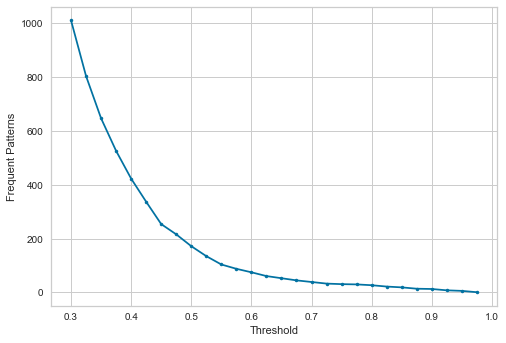

In [51]:
n_patterns = []
rango = np.arange(0.3, 1, 0.025)
for i in rango:
    pf = FP.apriori(fer_binarizado, min_support=i, use_colnames=True)
    l = len(pf)
    n_patterns.append(l)

plt.plot(rango, n_patterns, marker='.')    
plt.xlabel('Threshold')
plt.ylabel('Frequent Patterns')
plt.show()

In [52]:
ferSongs = FP.apriori(fer_binarizado, min_support=0.25, use_colnames=True)

for pattern in zip(ferSongs.itemsets, ferSongs.support):
    # if len(pattern) >= 2:
    if 'time_signature_4' not in list(pattern[0]) and 'mode_1' not in list(pattern[0]) and 'mode_0' not in list(pattern[0]):
        print(list(pattern[0]),pattern[1])

['danceability_7.0'] 0.3
['loudness_-4000.0'] 0.6079365079365079
['loudness_-3000.0'] 0.2761904761904762
['speechiness_-1.0'] 0.9571428571428572
['acousticness_0.0'] 0.873015873015873
['instrumentalness_0.0'] 0.9507936507936507
['liveness_0.0'] 0.9936507936507937
['valence_-4.0'] 0.25555555555555554
['valence_-3.0'] 0.273015873015873
['valence_-2.0'] 0.2523809523809524
['tempo_1.0'] 0.34444444444444444
['tempo_2.0'] 0.2904761904761905
['duration_ms_2'] 0.2507936507936508
['duration_ms_3'] 0.5349206349206349
['gender(of the atrist(s))_1'] 0.3761904761904762
['gender(of the atrist(s))_2'] 0.44603174603174606
['type(solo, colab, grpup/band)_1'] 0.5349206349206349
['type(solo, colab, grpup/band)_3'] 0.30158730158730157
['country_2'] 0.4603174603174603
['number_integrants_1'] 0.680952380952381
['song_language_1'] 0.746031746031746
['label_1'] 0.4650793650793651
['label_2'] 0.5349206349206349
['speechiness_-1.0', 'danceability_7.0'] 0.2841269841269841
['danceability_7.0', 'acousticness_0.0']